In [ ]:
#Social_Network_Ads.csv

**Import libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

**Importing the dataset**

In [ ]:
df=pd.read_csv('/content/Social_Network_Ads.csv')
x=df.iloc[:,[2,3]].values
y=df.iloc[:,4].values

**Splitting the dataset into the Training set and Test set**

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

**Feature Scaling**

In [ ]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

**Fitting SVM to the Training set**

In [ ]:
svm_model=SVC(kernel='linear',random_state=0)
svm_model.fit(x_train,y_train)

SVC(kernel='linear', random_state=0)

**Predicting the Test set results**

In [ ]:
y_pred=svm_model.predict(x_test)

**Making the Confusion Matrix**

In [ ]:
confu_mat=confusion_matrix(y_test,y_pred)
print(confu_mat)

[[57  1]
 [ 6 16]]


In [ ]:
accuracies=cross_val_score(estimator=svm_model,X=x_train,y=y_train,cv=10)
print(accuracies.mean())
print(accuracies.std())

0.81875
0.1015504800579495


In [ ]:
parameters=[{'C':[1,10,100,1000],'kernel':['linear']},{'C':[1,10,100,1000],'kernel':['rbf'],'gamma':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]}]
grid_search=GridSearchCV(estimator=svm_model,param_grid=parameters,scoring='accuracy',cv=10,n_jobs=-1)
grid_search=grid_search.fit(x_train,y_train)
best_accuracy=grid_search.best_score_
best_parameters=grid_search.best_params_
print(best_parameters)

{'C': 1, 'gamma': 0.9, 'kernel': 'rbf'}


In [ ]:
svm_model=SVC(kernel='rbf',C=1,gamma=0.9)
svm_model.fit(x_train,y_train)

SVC(C=1, gamma=0.9)

In [ ]:
y_pred=svm_model.predict(x_test)
confu_mat=confusion_matrix(y_test,y_pred)
print(confu_mat)

[[55  3]
 [ 1 21]]


**Visualising the Training set results**

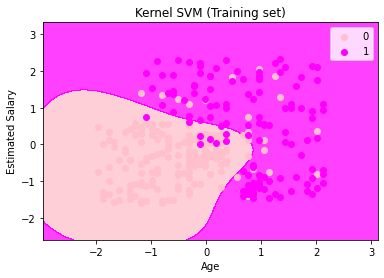

In [ ]:
from matplotlib.colors import ListedColormap
X_set,y_set=x_train,y_train
X1,X2=np.meshgrid(np.arange(start=X_set[:,0].min()-1,stop=X_set[:,0].max()+1,step=0.01),
                     np.arange(start=X_set[:,1].min()-1,stop=X_set[:,1].max()+1,step=0.01))
plt.contourf(X1,X2,svm_model.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75,cmap=ListedColormap(('pink', 'magenta')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1],
                c = ListedColormap(('pink', 'magenta'))(i),label=j)
plt.title('Kernel SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

**Visualising the Test set results**

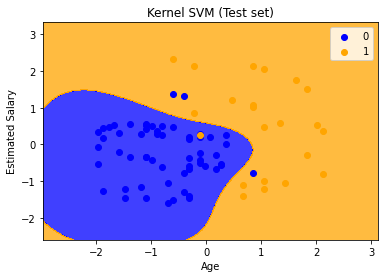

In [ ]:
X_set,y_set=x_test,y_test
X1,X2 = np.meshgrid(np.arange(start=X_set[:,0].min()-1,stop=X_set[:,0].max()+1,step=0.01),
                     np.arange(start=X_set[:,1].min()-1,stop=X_set[:,1].max()+1,step=0.01))
plt.contourf(X1,X2,svm_model.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75,cmap=ListedColormap(('blue', 'orange')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j,0], X_set[y_set==j,1],
                c=ListedColormap(('blue','orange'))(i),label=j)
plt.title('Kernel SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()